# Setup

## Imports

In [17]:
import os
import pathlib
import sys

import numpy as np
import itertools as itert

path_to_package = str(pathlib.Path(os.getcwd()).parents[0])+'/Main Package/'
print(path_to_package)
sys.path.insert(0,path_to_package)

main_path = str(pathlib.Path(os.getcwd()).parents[0])+'/'

import importlib

import Transmon_Cavity_Model as TCM

/local/gr400/Git Repositories/CavityModeDriveSimulations/Main Package/


In [2]:
importlib.reload(TCM)

<module 'Transmon_Cavity_Model' from '/local/gr400/Git Repositories/CavityModeDriveSimulations/Main Package/Transmon_Cavity_Model.py'>

# Making a 1 Mode Model

## Defining the Model

In [33]:
E_J = 27
E_C = 0.11
E_osc = 6.2
g = 0.025

# These are the number of modes that are of interest
N_Transmon = 4  # these are the default values. 
N_Cavity = 5

# This is the actual dimension of the hilbert spaces that will be simulated. By default these are +2 the numbers above 
transmon_truncated_dim = 10
resonator_truncated_dim = 10

model_name = "Demo"
save_path = "Model_Saves/"+model_name+"/"


demo = TCM.Transmon_Cavity_Model(E_J = E_J, E_C = E_C, E_osc =E_osc, g = g, N_Transmon = N_Transmon, N_Cavity = N_Cavity, transmon_truncated_dim=transmon_truncated_dim, resonator_truncated_dim=resonator_truncated_dim, model_name = model_name, save_path = save_path)

## Getting States

States are index by a list [transmon, resonator] with the ground state being [0, 0]. The transmon states can also be denoted by the letters g,e,f,h,i,j,k,l,m,o,p for 0 through 10 (see TCM.Transmon_Labels_LK). The dressed states are labeled by their corresponding undressed states (which breaks down at some point for higher levels)

In [28]:
psi = demo.get_dressed_state([0,0])

## Driving States

For this example we will be buildin $|g1\rangle$ by going $|g0\rangle\to|e0\rangle\to|f0\rangle\to|g1\rangle$. For the transmon pulses, we drive at a small drive strength so we don't need to find the stark shift. For the $|f0\rangle \to |g1\rangle$, we need a strong drive, and thus we need to find the stark shift!

### Calibrating a Pulse

#### $|g0\rangle\to|e0\rangle$

Doing step 1/11, t = 100.0
10.1%. Run time:   0.94s. Est. time left: 00:00:00:08
20.1%. Run time:   1.85s. Est. time left: 00:00:00:07
30.1%. Run time:   2.76s. Est. time left: 00:00:00:06
40.1%. Run time:   3.70s. Est. time left: 00:00:00:05
50.0%. Run time:   4.59s. Est. time left: 00:00:00:04
60.0%. Run time:   5.46s. Est. time left: 00:00:00:03
70.0%. Run time:   6.31s. Est. time left: 00:00:00:02
80.0%. Run time:   7.12s. Est. time left: 00:00:00:01
90.0%. Run time:   7.87s. Est. time left: 00:00:00:00
Total run time:   8.61s
Transition prob: 0.9983798269495272
-----------------------------------------------------------------

Doing step 2/11, t = 100.5
10.0%. Run time:   0.92s. Est. time left: 00:00:00:08
20.1%. Run time:   1.83s. Est. time left: 00:00:00:07
30.0%. Run time:   2.73s. Est. time left: 00:00:00:06
40.1%. Run time:   3.63s. Est. time left: 00:00:00:05
50.0%. Run time:   4.51s. Est. time left: 00:00:00:04
60.0%. Run time:   5.42s. Est. time left: 00:00:00:03
70.1%. Ru

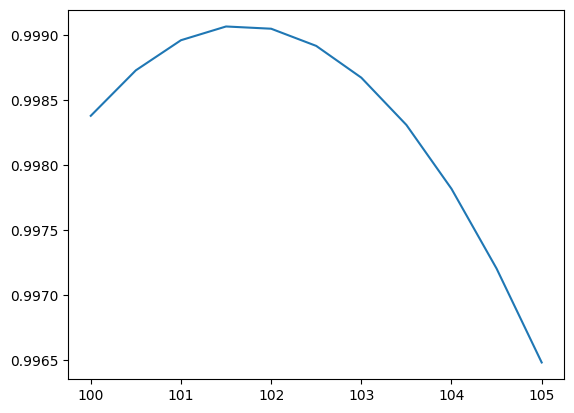

In [5]:
pulse_args = {"epsilon":0.005, "shift":0}
g0 = [0,0]
e0 = [1,0]
t0 = 100
tf = 105
demo.CalibratePulse("Guassian", g0, e0, pulse_args, t0, tf, steps = 11, op_name = "demo_g0e0")

In [6]:
demo.op_drive_params_dict

{'demo_g0e0': {'epsilon': 0.005,
  'shift': 0,
  'freq_d': 4.760455558394497,
  'Envelope': 'Guassian',
  'pulse_time': 101.5,
  'Envelope Args': {'sigma': 26.25, 'mu': 52.5}}}

#### $|e0\rangle\to|f0\rangle$

Doing step 1/11, t = 72.0
10.1%. Run time:   0.55s. Est. time left: 00:00:00:04
20.1%. Run time:   1.08s. Est. time left: 00:00:00:04
30.1%. Run time:   1.61s. Est. time left: 00:00:00:03
40.1%. Run time:   2.13s. Est. time left: 00:00:00:03
50.1%. Run time:   2.66s. Est. time left: 00:00:00:02
60.1%. Run time:   3.18s. Est. time left: 00:00:00:02
70.0%. Run time:   3.67s. Est. time left: 00:00:00:01
80.0%. Run time:   4.13s. Est. time left: 00:00:00:01
90.0%. Run time:   4.57s. Est. time left: 00:00:00:00
Total run time:   4.98s
Transition prob: 0.9992053423983989
-----------------------------------------------------------------

Doing step 2/11, t = 72.2
10.1%. Run time:   0.55s. Est. time left: 00:00:00:04
20.1%. Run time:   1.08s. Est. time left: 00:00:00:04
30.0%. Run time:   1.62s. Est. time left: 00:00:00:03
40.1%. Run time:   2.20s. Est. time left: 00:00:00:03
50.1%. Run time:   2.73s. Est. time left: 00:00:00:02
60.0%. Run time:   3.25s. Est. time left: 00:00:00:02
70.1%. Run 

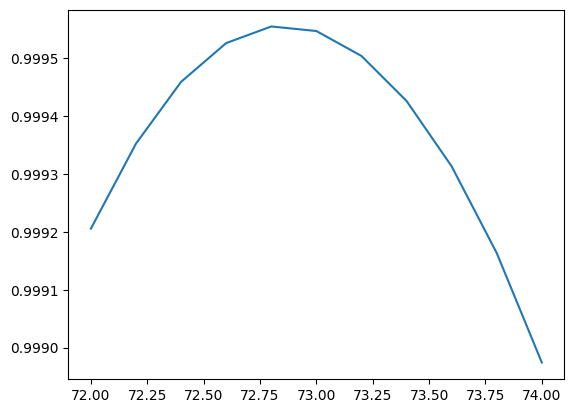

In [7]:
pulse_args = {"epsilon":0.005, "shift":0}
e0 = [1,0]
f0 = [2,0]
t0 = 72
tf = 74
demo.CalibratePulse("Guassian", e0, f0, pulse_args, t0, tf, steps = 11, op_name = "demo_e0f0")

In [8]:
demo.op_drive_params_dict

{'demo_g0e0': {'epsilon': 0.005,
  'shift': 0,
  'freq_d': 4.760455558394497,
  'Envelope': 'Guassian',
  'pulse_time': 101.5,
  'Envelope Args': {'sigma': 26.25, 'mu': 52.5}},
 'demo_e0f0': {'epsilon': 0.005,
  'shift': 0,
  'freq_d': 4.644451981859731,
  'Envelope': 'Guassian',
  'pulse_time': 72.8,
  'Envelope Args': {'sigma': 18.5, 'mu': 37.0}}}

#### $|f0\rangle\to|g1\rangle$

##### Finding Stark Shifts

The stark shift fitter has a lot of options. By default it goes through the searching process using floquet. However, there are options to generate a whole list of stark shifts and then do a high order polynomial fit. Using this, the function will just grab the stark shift for what ever $\varepsilon$ you want within reason. It isn't exact but it is fast. This is useful if you wanted to chirp a pulse. This example will just do the standard stark shift finding procedure. 

Also, this function takes in the state name, aka the list or tuple mentioned above. Not the actual wavefunction!

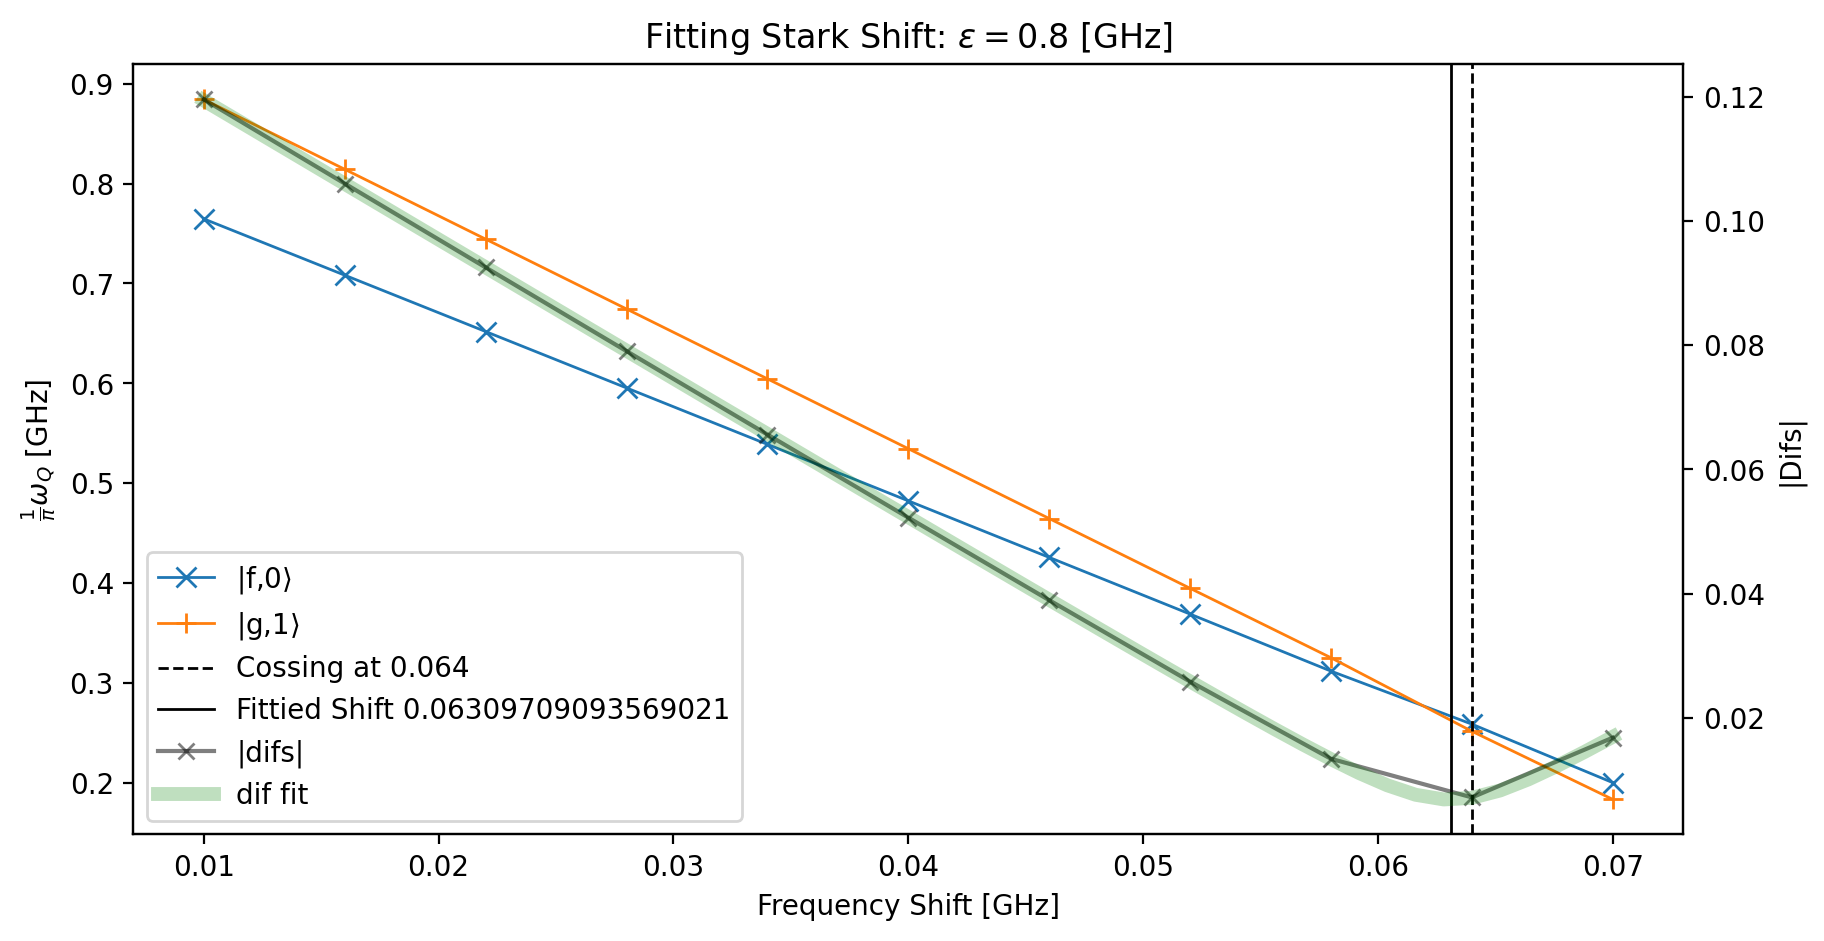

Stark Shift: 0.06309709093569021
Optimal Drive Time: 147.07507276784798


In [9]:
f0 = [2,0] 
g1 = [0,1] 

epsilon = 0.8

stark_shift_samples = np.linspace(0.01, 0.07, 11)
kwargs = {"shifts": stark_shift_samples, "show_plot": True} # These kwargs are passsed to TCM.FindResonanceFloquet

starkshift_fit_res = demo.GetStarkShift(f0, g1, epsilon, kwargs = kwargs)

print(f"Stark Shift: {starkshift_fit_res.x[0]}")
print(f"Optimal Drive Time: {1/starkshift_fit_res.fun}")

##### Now to calibrate the pulse!

For the sideband, we use a flattop pulse with a sine squared ramp with a ramp time of 10ns.

Doing step 1/11, t = 147.07507276784798
10.1%. Run time:   0.94s. Est. time left: 00:00:00:08
20.0%. Run time:   1.89s. Est. time left: 00:00:00:07
30.0%. Run time:   2.87s. Est. time left: 00:00:00:06
40.0%. Run time:   3.85s. Est. time left: 00:00:00:05
50.0%. Run time:   4.85s. Est. time left: 00:00:00:04
60.1%. Run time:   5.74s. Est. time left: 00:00:00:03
70.0%. Run time:   6.56s. Est. time left: 00:00:00:02
80.0%. Run time:   7.35s. Est. time left: 00:00:00:01
90.0%. Run time:   8.13s. Est. time left: 00:00:00:00
Total run time:   9.05s
Transition prob: 0.9901768656152001
-----------------------------------------------------------------

Doing step 2/11, t = 149.07507276784798
10.1%. Run time:   0.93s. Est. time left: 00:00:00:08
20.0%. Run time:   1.87s. Est. time left: 00:00:00:07
30.0%. Run time:   2.86s. Est. time left: 00:00:00:06
40.0%. Run time:   3.86s. Est. time left: 00:00:00:05
50.0%. Run time:   4.86s. Est. time left: 00:00:00:04
60.1%. Run time:   5.78s. Est. time l

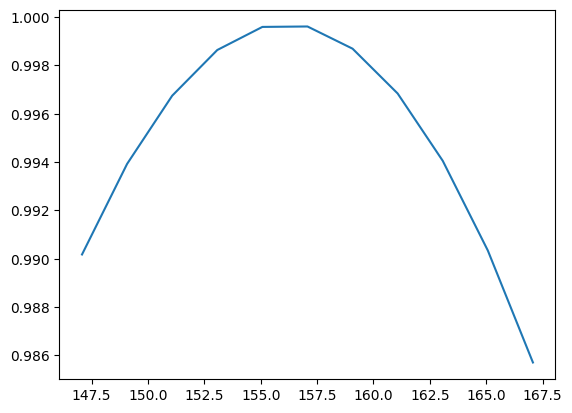

In [10]:
pulse_args = {"Envelope":"Sine_Squared_Ramp", "shift":starkshift_fit_res.x[0], "Envelope Args": {"ramp_time":10}, "epsilon":epsilon}

t0 = 1/starkshift_fit_res.fun
tf = t0+20
demo.CalibratePulse("Ramped", f0, g1, pulse_args, t0, tf, steps = 11, op_name = "demo_f0g1")

In [11]:
demo.op_drive_params_dict

{'demo_g0e0': {'epsilon': 0.005,
  'shift': 0,
  'freq_d': 4.760455558394497,
  'Envelope': 'Guassian',
  'pulse_time': 101.5,
  'Envelope Args': {'sigma': 26.25, 'mu': 52.5}},
 'demo_e0f0': {'epsilon': 0.005,
  'shift': 0,
  'freq_d': 4.644451981859731,
  'Envelope': 'Guassian',
  'pulse_time': 72.8,
  'Envelope Args': {'sigma': 18.5, 'mu': 37.0}},
 'demo_f0g1': {'Envelope': 'Sine_Squared_Ramp',
  'shift': 0.06309709093569021,
  'Envelope Args': {'ramp_time': 10, 'pulse_time': 157.07507276784798},
  'epsilon': 0.8,
  'freq_d': -3.2038871029756706,
  'pulse_time': 157.07507276784798}}

### Running the Pulse

#### Running the Sequence

In [12]:
psi0 = demo.get_dressed_state([0,0])
res = demo.Run_Pulse_Sequence(psi0, ["demo_g0e0", "demo_e0f0", "demo_f0g1"])


 Doing Gate 1/3 (demo_g0e0), Gate Time: 101.5
-------------------------------------------------------------------
10.0%. Run time:   0.95s. Est. time left: 00:00:00:08
20.1%. Run time:   1.87s. Est. time left: 00:00:00:07
30.0%. Run time:   2.83s. Est. time left: 00:00:00:06
40.1%. Run time:   3.76s. Est. time left: 00:00:00:05
50.0%. Run time:   4.69s. Est. time left: 00:00:00:04
60.0%. Run time:   5.60s. Est. time left: 00:00:00:03
70.1%. Run time:   6.49s. Est. time left: 00:00:00:02
80.0%. Run time:   7.34s. Est. time left: 00:00:00:01
90.1%. Run time:   8.19s. Est. time left: 00:00:00:00
Total run time:   8.93s

 Doing Gate 2/3 (demo_e0f0), Gate Time: 72.8
-------------------------------------------------------------------
10.0%. Run time:   0.55s. Est. time left: 00:00:00:04
20.0%. Run time:   1.12s. Est. time left: 00:00:00:04
30.0%. Run time:   1.68s. Est. time left: 00:00:00:03
40.1%. Run time:   2.23s. Est. time left: 00:00:00:03
50.1%. Run time:   2.78s. Est. time left: 00:

 /local/gr400/Git Repositories/CavityModeDriveSimulations/Main Package/Transmon_Cavity_Model.py: 1239

#### Making Plot!

##### Simple Plot

[]


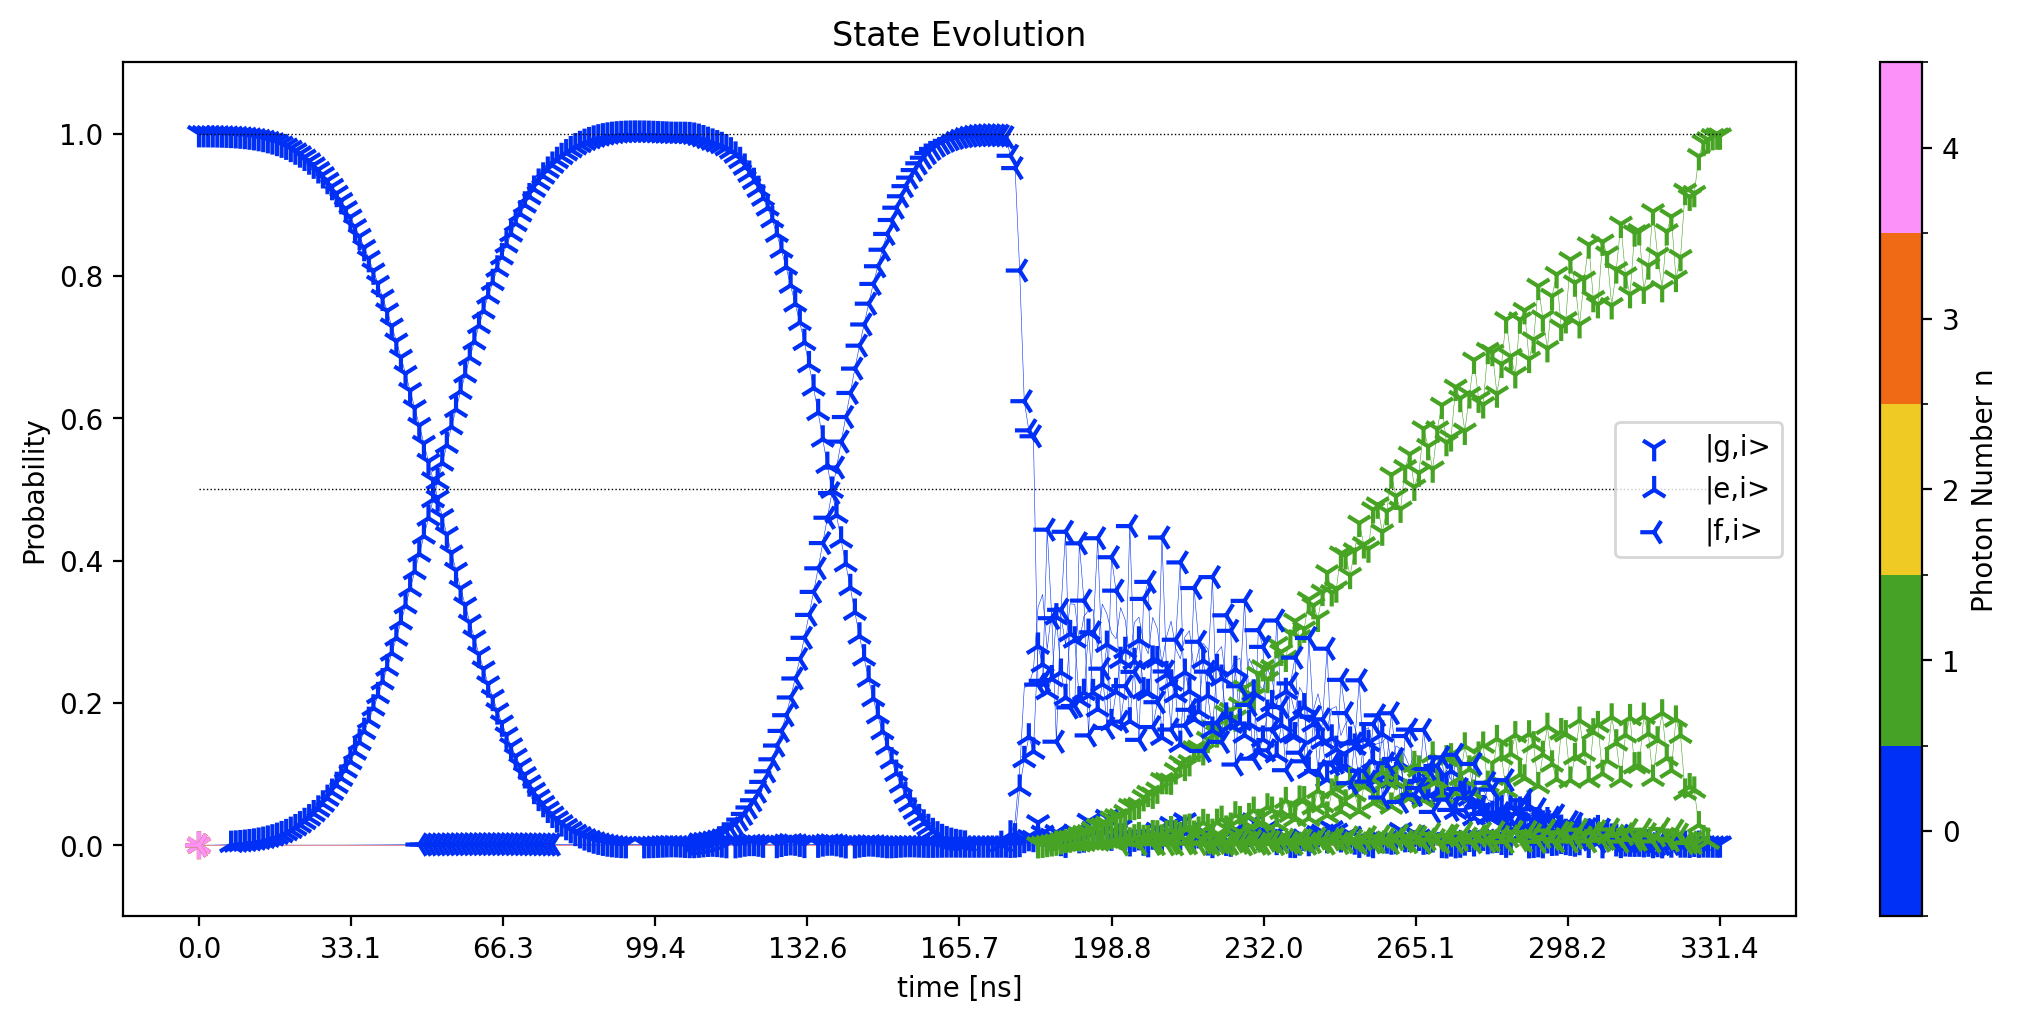

In [22]:
demo.Plot_State_Evolution(res[0], res[1], plot_every = 10)

##### Plot with some args

['title', 'x_ticks', 'emphasize_states', 'use_all_states', 'plots', 'legend_args', 'figsize', 'dpi', 'debug', 'emphasis_alpha', 'markersize', 'small_amp_cutoff']
Plotting Probability


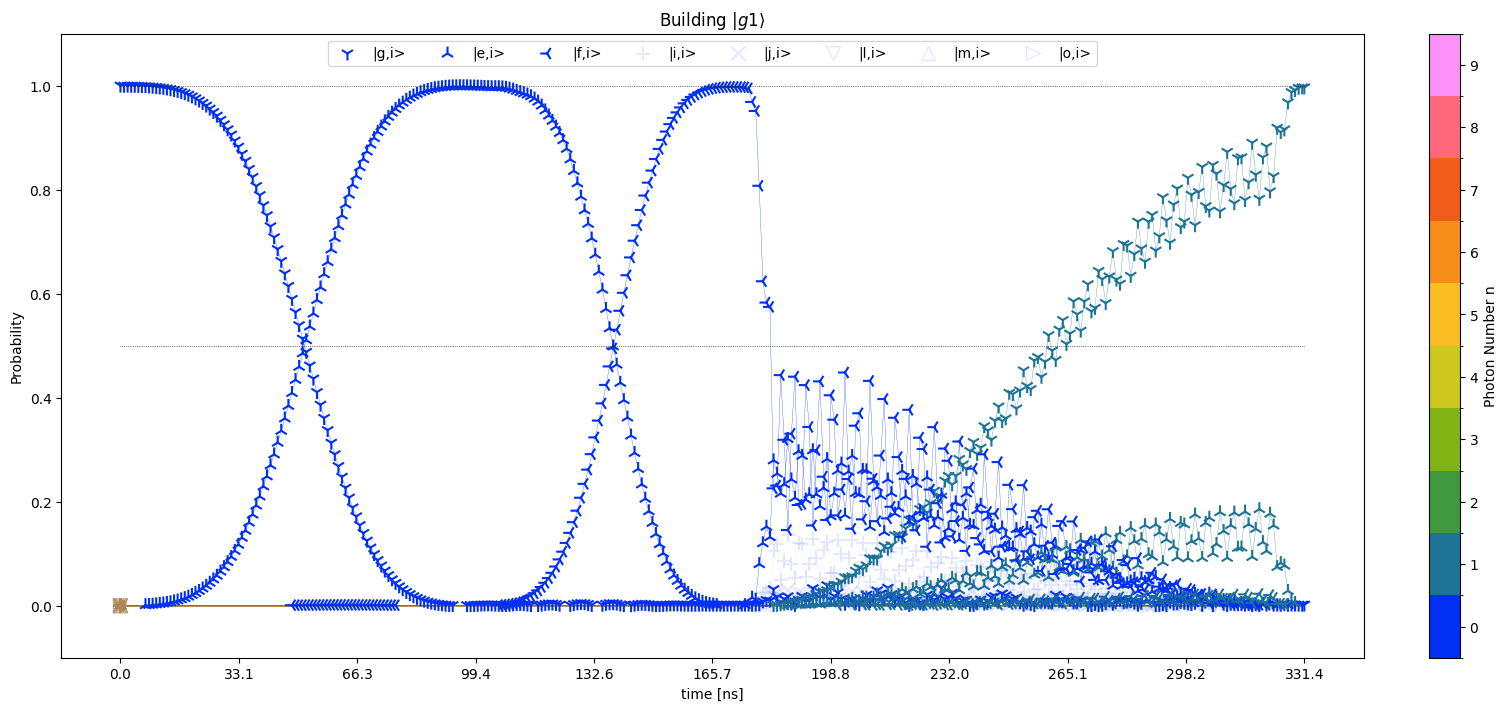

In [19]:
emphasize_states = []
for pair in itert.product(['g', 'e', 'f'], [0,1,2,3]):
    emphasize_states.append(f'{pair[0]}{pair[1]}')
emphasize_states.append('g4')


kwargs = {'title': r'Building $|g1\rangle$', 'x_ticks': np.linspace(0,res[0][-1], 11), 'emphasize_states':emphasize_states, 'use_all_states':True, 'plots':['Probability'], 'legend_args':{'ncol':10, 'loc':'upper center'}, 'figsize':(30/2,7), 'dpi':100, 'debug': True, 'emphasis_alpha':0.1, 'markersize':100, 'small_amp_cutoff':1e-3}

demo.Plot_State_Evolution(res[0], res[1], plot_every = 10, fig_kwargs = kwargs)

## Saving, Updating, Loading a Model and Copying a model

### Saving a Model

In [34]:
demo.Save_Params()

### Updating Model Parameters

If you update the model parameters after creating the model, the dictionary model.model_params won't be updated. This dictionary is important as it is what is used to initialize the model after loading it. 

This function is useful fro doing stuff like copying a model. You would first copy the model (see the sections after this), change what ever parameters you want, including the model name and save path, then run the following!

In [36]:
demo.update_model_params()

### Loading a Model

To load a model, do the following!

In [35]:
model_name = "Demo"
save_path = "Model_Saves/"+model_name
file_name = save_path+"/"+model_name+".json"
print(file_name)
demo_loaded = TCM.LoadModel(file_name)

Model_Saves/Demo/Demo.json


### Copying a model

In [40]:
old_model_name = "Demo"
save_path = "Model_Saves/"

new_model_name = "Demo_Copy"


print(file_name)
demo_copied = TCM.CopyModel(old_model_name, new_model_name, save_path)

Model_Saves/Demo/Demo.json
